In [1]:
import os
import numpy as np
import librosa
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
root_path = "F:/DATAS/COUGHVID-public_dataset_v3/coughvid_20211012/"

## 统计每个标签的数目

In [5]:
datadf1 = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/waveinfo.csv", delimiter=',', header=0, index_col=0)
datadf1.groupby("status")["filename"].count()

status
COVID-19         819
healthy        11297
symptomatic     2969
Name: filename, dtype: int64

# 加上扩展名

In [4]:

filename = []
for i, uuid in enumerate(datadf1.iloc[:, 0]):
    for ext in ["webm", "wav", "ogg"]:
        fname = root_path + uuid + '.' + ext
        if os.path.exists(fname):
            filename.append(fname)
print("end")

# datadf1["filename"] = filename
# datadf2 = datadf1.iloc[:, [5,1,2,3,4]]
# datadf2.to_csv("F:/DATAS/COUGHVID-public_dataset_v3/waveinfo.csv", sep=',')

end


# 合并新的列 已完成

In [2]:
datadf1 = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/waveinfo.csv", delimiter=',', header=0, index_col=0)
datadf2 = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/coughvid_20211012/metadata_compiled.csv", delimiter=',',
                 header=0, index_col=0)
# print(datadf1.head(15))
print("row num:", len(datadf1), len(datadf2))
datadf2 = datadf2.iloc[:, [0,9]]
datadf1 = datadf1.where(datadf1["cough_detected"]>0.65).where(datadf1["duration"] < 13).where(datadf1["duration"] > 0.86).dropna(axis=0)

row num: 34434 34434


In [3]:
datadf3 = datadf1.set_index("uuid").join(datadf2.set_index("uuid"), on="uuid", how="left")
print(len(datadf3))
datadf3

20969


,cough_detected,nframes,duration,status
uuid,,,,
00039425-7f3a-42aa-ac13-834aaa2b6b92,0.9609,215649.0,9.7800,healthy
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.9301,99225.0,4.5000,healthy
001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.9968,216972.0,9.8400,healthy
001e2f19-d81c-4029-b33c-d2db56b23a4a,0.7811,210357.0,9.5400,healthy
0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952,0.8937,160083.0,7.2600,healthy
...,...,...,...,...
ffeea120-92a4-40f9-b692-c3865c7a983f,0.9784,201096.0,9.1200,healthy
fff13fa2-a725-49ef-812a-39c6cedda33d,0.7154,218295.0,9.9000,healthy
fff30afc-db62-4408-a585-07ca9a254fcc,0.9698,218295.0,9.9000,NaN


In [5]:
datadf3.to_csv("F:/DATAS/COUGHVID-public_dataset_v3/waveinfo.csv", sep=',')

## 排序和where筛选

In [4]:
datadf1 = datadf1.where(datadf1["cough_detected"]>0.65).where(datadf1["duration"] < 13).where(datadf1["duration"] > 0.86).dropna(axis=0)
datadf1 = datadf1.sort_values("uuid", ascending=False)
datadf1.head(15)

,uuid,cough_detected,nframes,duration
34433,fffd1834-6cf2-4782-bb30-04c31b46a1fe,0.9754,71501.0,3.2427
34432,fffce9f0-a5e8-4bee-b13b-c671aac4a61c,0.9754,97902.0,4.4400
34428,fff30afc-db62-4408-a585-07ca9a254fcc,0.9698,218295.0,9.9000
34427,fff13fa2-a725-49ef-812a-39c6cedda33d,0.7154,218295.0,9.9000
34426,ffeea120-92a4-40f9-b692-c3865c7a983f,0.9784,201096.0,9.1200
34425,ffedc843-bfc2-4ad6-a749-2bc86bdac84a,0.9498,213003.0,9.6600
34424,ffe8b243-9c7b-49f1-8d7d-a953f736ea4b,0.9818,222029.0,10.0693
34422,ffe13fcf-c5c2-4a6a-a9fc-e010f4f033c1,0.9485,218295.0,9.9000
34421,ffe0658f-bade-4654-ad79-40a468aabb03,0.9846,210357.0,9.5400
34420,ffdf80c2-be81-4fc9-9484-a72223cfc87d,0.6991,67473.0,3.0600


# 波形图绘图

In [8]:
x, sr = librosa.load(root_path + "ffe8b243-9c7b-49f1-8d7d-a953f736ea4b.wav")
print("sample rate:", sr)
# print("filename:", root_path+df.iloc[0, :][0])
# ipd.Audio(x, rate=sr)

sample rate: 22050


C:\Users\zhaoke\AppData\Local\Temp\ipykernel_22468\877900267.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(root_path + "ffe8b243-9c7b-49f1-8d7d-a953f736ea4b.wav")
C:\Users\zhaoke\miniconda3\envs\torch-0\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


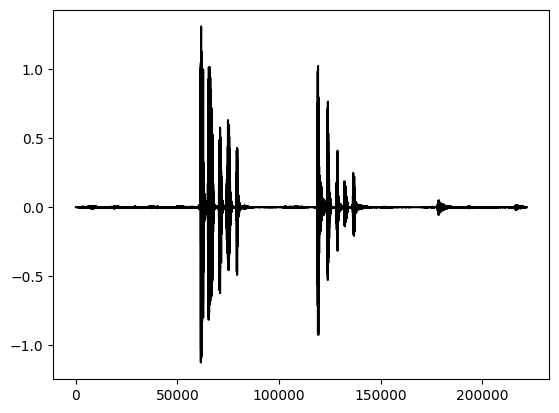

In [10]:
plt.figure(0)
plt.plot(range(len(x)), x, color="black")
plt.show()

## 读取部分列

In [11]:
metadata = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/coughvid_20211012/metadata_compiled.csv", delimiter=',',
                 header=0, index_col=0)
datadf1 = metadata.iloc[:, [0,2,9]]
datadf1 = datadf1.sort_values("status", ascending=True)
datadf1.head(15)

,uuid,cough_detected,status
12201,5aa358bd-10a7-4d24-b5a7-35bc0b072ca8,0.0535,COVID-19
3991,1d9490a3-155d-4eb5-a34d-acef154740ed,0.1140,COVID-19
29711,dd235b59-b0df-4eb7-9024-3b11e1515888,0.9254,COVID-19
20048,953e2f0c-d36f-4365-baa4-1d310ed74278,0.9688,COVID-19
3969,1d6f3f96-fb43-49e6-8c38-70586a9dc52f,0.0510,COVID-19
29721,dd31227a-b7ae-4658-889f-cf773b7acd8a,0.1179,COVID-19
29741,dd489c88-affc-4142-ac56-752c3a433991,0.9453,COVID-19
3938,1d471862-8805-411b-bd10-2b8e9ffdf718,0.9946,COVID-19
3932,1d3f954c-8d15-4279-832b-e2487b96750f,0.8709,COVID-19
12399,5c25d8f9-0c68-46b2-95be-71c84536978d,0.0070,COVID-19


## 已经合并得到的信息↓，不再需要运行

In [2]:
df = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/dura_stat.csv", delimiter='\t', header=None, index_col=None)
df.columns = ["filename", "nframes", "duration"]
df = df.sort_values("nframes", ascending=True)
print(df.head(15))

                                       filename  nframes  duration
3814   1c457e96-6a2b-40aa-a065-4a8901c0e759.wav      941    0.0427
21384  9f4b2c6a-1b37-45a1-be61-69aeda710f94.wav      941    0.0427
34118  fd9a47b3-9b67-4977-9477-f64872da4407.wav      941    0.0427
8728   40bde2e7-95fe-4920-ab88-8c4db4f3d536.wav      941    0.0427
27653  ce09de17-51b0-435a-9a0f-eb6ee8ee0233.wav      941    0.0427
22061  a47c5c5c-d114-4c98-9694-2c86aef9b247.wav      941    0.0427
13586  64c5aeae-db36-48a9-b4e6-2359ce19cdf5.wav     1024    0.0464
21706  a1f81d69-3d9c-4513-ab7e-c6589e86324f.wav     1024    0.0464
6314   2f29ecb6-b231-4882-bd8e-0a215e96edf1.wav     1024    0.0464
21882  a31f30cd-26ea-453e-b860-12475282df67.wav     1024    0.0464
11755  575185d8-ab48-417a-a582-f3cb5cb92b50.wav     1024    0.0464
33960  fc695cbd-c0b3-4698-a070-d6481ee4fd12.wav     1882    0.0854
5261   274d0bfc-3941-4864-8581-5dcad50f9e3d.wav     2048    0.0929
31684  ebe7d6bd-8230-430f-99fc-c68a99003e27.wav     2048    0.

In [ ]:
metadata = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/coughvid_20211012/metadata_compiled.csv", delimiter=',',
                 header=0, index_col=0)
datadf1 = metadata.iloc[:, [0,2]]
datadf1 = datadf1.sort_values("uuid", ascending=True)
datadf1.head(15)

datadf2 = pd.read_csv("F:/DATAS/COUGHVID-public_dataset_v3/dura_stat.csv", delimiter='\t', header=None, index_col=None)
datadf2.columns = ["uuid", "nframes", "duration"]
datadf2 = datadf2.sort_values("uuid", ascending=True)
datadf2.head(15)

datadf1["nframes"] = datadf2["nframes"]
datadf1["duration"] = datadf2["duration"]


In [33]:
datadf1 = datadf1.sort_values("cough_detected", ascending=True)
datadf1.to_csv("F:/DATAS/COUGHVID-public_dataset_v3/waveinfo.csv", sep=',')

PermissionError: [Errno 13] Permission denied: 'F:/DATAS/COUGHVID-public_dataset_v3/waveinfo.csv'

In [57]:
x, sr = librosa.load(root_path + "00bfe21c-ab71-4e5a-a941-4f83f5de5c82.wav")
print("sample rate:", sr)
print("filename:", root_path+df.iloc[0, :][0])
ipd.Audio(x, rate=sr)

sample rate: 22050
filename: F:/DATAS/COUGHVID-public_dataset_v3/coughvid_20211012/1c457e96-6a2b-40aa-a065-4a8901c0e759.wav


C:\Users\zhaoke\AppData\Local\Temp\ipykernel_8112\1631674216.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(root_path + "00bfe21c-ab71-4e5a-a941-4f83f5de5c82.wav")
C:\Users\zhaoke\miniconda3\envs\torch-0\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [56]:
datadf1 = datadf1.sort_values("duration", ascending=False)
datadf1.where(datadf1["cough_detected"]>0.65).where(datadf1["duration"] < 13).where(datadf1["duration"] > 0.86).dropna(axis=0)

,uuid,cough_detected,nframes,duration
11627,5662edd2-726f-4755-863a-24ae82b09d22,0.9358,285768.0,12.9600
21563,a0da6b39-0df1-47bb-9d9d-98209d22e248,0.9850,276507.0,12.5400
25870,c0a8f8f2-1697-4b28-a30e-f48d926c11b2,0.7859,267544.0,12.1335
24992,ba3e704b-3501-4d85-923f-0c9632b547e8,0.9844,250047.0,11.3400
10406,4d15ccc5-fb87-4cbe-94ad-a448cc90ea9d,0.9773,238140.0,10.8000
...,...,...,...,...
812,06242f43-3250-4995-b226-ac49448fae01,0.6659,21168.0,0.9600
32253,f01dcc37-a274-49b8-ba2e-eedb8b7ef170,0.9493,21168.0,0.9600
6657,31987195-72fe-4bf2-842c-82278e6c60a3,0.6739,21168.0,0.9600
19214,8f016f2b-6f3c-4b58-8045-16d13cdfbe7c,0.6619,21168.0,0.9600


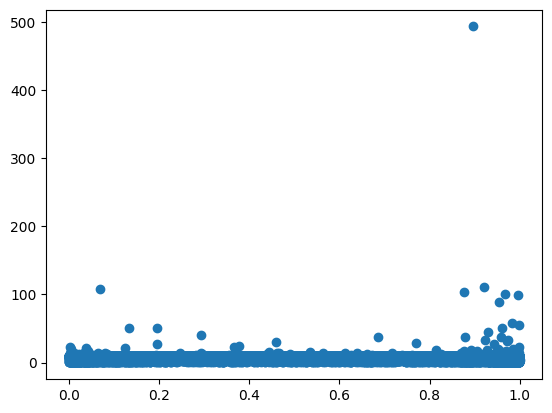

In [35]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.scatter(datadf1["cough_detected"], datadf2["duration"])
plt.show()